In [2]:
import sys
from loadTDMS import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm

In [5]:
%%time
last_t = 0

for i in range(341,1219, 2):
    t = 0
    num = int((i+1 - 16)/2) - 1
    nc_d_path = fr'\\DAISY05\users\park\100 実験データ（RAW）\20220630---切削実験---AE+切削抵抗\Dynamometer\1-5000\Dynamometer_{i-1}.tdms'
    c_d_path = fr'\\DAISY05\users\park\100 実験データ（RAW）\20220630---切削実験---AE+切削抵抗\Dynamometer\1-5000\Dynamometer_{i}.tdms'
    
    dt = 333333
    nc_d = load_tdms(nc_d_path, ch_num=3)
    c_d = load_tdms(c_d_path, ch_num=3)

    N = len(c_d[0])
    
    # linspace(開始、終了、分割数)  
    t_d = np.linspace(last_t, last_t + N/dt, N)
    t = np.linspace(t, t + N/dt ,N)
    
    # 切削距離[m]のリスト
    cd_d = t_d*(190/60)/1000
    
    # 次のパスの切削距離のスタート時点を更新する
    last_t = t_d[-1]
    last_d = cd_d[-1]

    #空転データの平均値を計算（切削動力計の傾き実験のy切片に当たる部分を計算）
    nc_x_a = sum(nc_d[0]) / len(nc_d[0])
    nc_y_a = sum(nc_d[1]) / len(nc_d[1])
    nc_z_a = sum(nc_d[2]) / len(nc_d[2])

    #切削動力計実験の傾き
    x_g = 0.00895
    y_g = 0.00515
    z_g = 0.00804
    
    #切削抵抗（ｘ、ｙ、ｚ）の全データのリスト
    #ドリフトを考慮した切削抵抗値（[V] ⇒ [N]の計算）
    c_d_x = (c_d[0][:5000000] - nc_x_a)/ x_g 
    c_d_y = (c_d[1][:5000000] - nc_y_a)/ y_g 
    c_d_z = (c_d[2][:5000000] - nc_z_a)/ z_g 
    
    print(num, c_d_y.min())

    #切削距離と時間も、切削抵抗と同じ次元に合わせる作業
    cd_d = cd_d[:5000000]
    t = t[:5000000]
    
    #(切削距離x,切削距離y,切削距離z,切削抵抗max_x,切削抵f抗max_y,切削抵抗max_z)をcsv保存
    dict1 = dict(d = cd_d[:],t = t[:], x = c_d_x[:], y = c_d_y[:], z = c_d_z[:])
#     dict1 = dict(d = cd_d[:],t = t[:], y = c_d_y[:])

    df1 = pd.DataFrame(data=dict1)
    df1.to_csv(fr'\\DAISY05\users\park\200 実験データ加工\20220630\切削抵抗/cuttingForce_allData_{num}.csv')

162 -163.61792
163 -162.05037
164 -150.75795
165 -145.25562
166 -168.8899
167 -155.4303
168 -155.72946
169 -1454.7462
170 -1455.9639
171 -133.22794
172 -149.25957
173 -128.9326
174 -140.99722
175 -128.02235
176 -150.20592
177 -132.82812
178 -140.50279
179 -137.33604
180 1169.1393
181 -138.24129
182 1150.7682
183 -134.08429
184 -148.75533
185 -139.3244
186 -144.04973
187 -141.5074
188 -139.33514
189 -144.42767
190 -149.61696
191 -157.32729
192 -154.27116
193 -140.77788
194 -140.48604
195 -133.80818
196 -178.7149
197 -145.53384
198 -1522.014
199 -133.71431
200 -150.99118
201 -144.61351
202 1207.917
203 -1524.0096
204 -138.99359
205 -138.8947
206 -147.626
207 -150.51268
208 -135.19695
209 -148.18729
210 -147.61397
211 -145.78922
212 -1555.1171
213 -131.33151
214 -142.17117
215 -134.95973
216 -134.44753
217 -136.23747
218 -136.54375
219 -137.14864
220 -139.44801
221 -141.83156
222 -135.43147
223 1252.0897
224 -143.2478
225 -130.9403
226 -140.33864
227 -147.5148
228 -144.29156
229 -136.4651

In [6]:
%%time
last_t = 0

for i in range(1261,1561, 2):
    t = 0
    num = int((i+1 - 16)/2) - 22
    nc_d_path = fr'\\DAISY05\users\park\100 実験データ（RAW）\20220630---切削実験---AE+切削抵抗\Dynamometer\1-5000\Dynamometer_{i-1}.tdms'
    c_d_path = fr'\\DAISY05\users\park\100 実験データ（RAW）\20220630---切削実験---AE+切削抵抗\Dynamometer\1-5000\Dynamometer_{i}.tdms'
    
    dt = 333333
    nc_d = load_tdms(nc_d_path, ch_num=3)
    c_d = load_tdms(c_d_path, ch_num=3)

    N = len(c_d[0])
    
    # linspace(開始、終了、分割数)  
    t_d = np.linspace(last_t, last_t + N/dt, N)
    t = np.linspace(t, t + N/dt ,N)
    
    # 切削距離[m]のリスト
    cd_d = t_d*(190/60)/1000
    
    # 次のパスの切削距離のスタート時点を更新する
    last_t = t_d[-1]
    last_d = cd_d[-1]

    #空転データの平均値を計算（切削動力計の傾き実験のy切片に当たる部分を計算）
    nc_x_a = sum(nc_d[0]) / len(nc_d[0])
    nc_y_a = sum(nc_d[1]) / len(nc_d[1])
    nc_z_a = sum(nc_d[2]) / len(nc_d[2])

    #切削動力計実験の傾き
    x_g = 0.00895
    y_g = 0.00515
    z_g = 0.00804
    
    #切削抵抗（ｘ、ｙ、ｚ）の全データのリスト
    #ドリフトを考慮した切削抵抗値（[V] ⇒ [N]の計算）
    c_d_x = (c_d[0][:5000000] - nc_x_a)/ x_g 
    c_d_y = (c_d[1][:5000000] - nc_y_a)/ y_g 
    c_d_z = (c_d[2][:5000000] - nc_z_a)/ z_g 
    
    print(num, c_d_y.min())

    #切削距離と時間も、切削抵抗と同じ次元に合わせる作業
    cd_d = cd_d[:5000000]
    t = t[:5000000]
    
    #(切削距離x,切削距離y,切削距離z,切削抵抗max_x,切削抵f抗max_y,切削抵抗max_z)をcsv保存
    dict1 = dict(d = cd_d[:],t = t[:], x = c_d_x[:], y = c_d_y[:], z = c_d_z[:])
#     dict1 = dict(d = cd_d[:],t = t[:], y = c_d_y[:])

    df1 = pd.DataFrame(data=dict1)
    df1.to_csv(fr'\\DAISY05\users\park\200 実験データ加工\20220630\切削抵抗/cuttingForce_allData_{num}.csv')

601 -82.30459
602 -120.66179
603 2088.2202
604 2082.8264
605 -132.43063
606 -121.15266
607 -129.2018
608 -124.21955
609 -135.89072
610 -149.13776
611 -133.75351
612 -119.45844
613 2097.3247
614 -127.40283
615 -124.47047
616 -263.6163
617 -134.21175
618 -121.56357
619 -141.57698
620 -133.46246
621 -130.45029
622 2113.2737
623 -141.24153
624 -128.70238
625 -118.58676
626 -134.42197
627 -117.637436
628 -133.12122
629 -149.8026
630 -126.19639
631 -143.08595
632 -128.78719
633 -127.36357
634 -130.01016
635 -128.18011
636 -123.14477
637 -143.3073
638 2152.3499
639 -129.02385
640 -124.711845
641 -120.48892
642 -122.82871
643 -122.617004
644 -127.46751
645 2177.887
646 -128.35873
647 -128.50015
648 -128.89204
649 2186.3914
650 -123.096855
651 2192.3113
652 -130.51866
653 -131.19238
654 -139.44366
655 -135.65257
656 -134.61261
657 -117.38865
658 -129.88933
659 -124.175705
660 -122.41771
661 -132.76749
662 -130.04701
663 -126.23194
664 -121.45547
665 -124.296814
666 -122.24845
667 -2623.241
668 

ValueError: All arrays must be of the same length

In [49]:
%%time
last_t = 0

for i in range(1536,1570, 2):
    t = 0
    num = int((i - 16 )/2) - 22
    nc_d_path = fr'\\DAISY05\users\park\100 実験データ（RAW）\20220630---切削実験---AE+切削抵抗\Dynamometer\1-5000\Dynamometer_{i-1}.tdms'
    c_d_path = fr'\\DAISY05\users\park\100 実験データ（RAW）\20220630---切削実験---AE+切削抵抗\Dynamometer\1-5000\Dynamometer_{i}.tdms'
    
    dt = 333333
    nc_d = load_tdms(nc_d_path, ch_num=3)
    c_d = load_tdms(c_d_path, ch_num=3)

    N = len(c_d[0])
    print(N)
    # linspace(開始、終了、分割数)  
    t_d = np.linspace(last_t, last_t + N/dt, N)
    t = np.linspace(t, t + N/dt ,N)
    
    # 切削距離[m]のリスト
    cd_d = t_d*(190/60)/1000
    
    # 次のパスの切削距離のスタート時点を更新する
    last_t = t_d[-1]
    last_d = cd_d[-1]

    #空転データの平均値を計算（切削動力計の傾き実験のy切片に当たる部分を計算）
    nc_x_a = sum(nc_d[0]) / len(nc_d[0])
    nc_y_a = sum(nc_d[1]) / len(nc_d[1])
    nc_z_a = sum(nc_d[2]) / len(nc_d[2])

    #切削動力計実験の傾き
    x_g = 0.00895
    y_g = 0.00515
    z_g = 0.00804
    
    #切削抵抗（ｘ、ｙ、ｚ）の全データのリスト
    #ドリフトを考慮した切削抵抗値（[V] ⇒ [N]の計算）
    c_d_x = (c_d[0][:2000000] - nc_x_a)/ x_g 
    c_d_y = (c_d[1][:2000000] - nc_y_a)/ y_g 
    c_d_z = (c_d[2][:2000000] - nc_z_a)/ z_g 
    
    print(num, c_d_y.min())

    #切削距離と時間も、切削抵抗と同じ次元に合わせる作業
    cd_d = cd_d[:2000000]
    t = t[:2000000]
    
    #(切削距離x,切削距離y,切削距離z,切削抵抗max_x,切削抵f抗max_y,切削抵抗max_z)をcsv保存
    dict1 = dict(d = cd_d[:],t = t[:], x = c_d_x[:], y = c_d_y[:], z = c_d_z[:])
#     dict1 = dict(d = cd_d[:],t = t[:], y = c_d_y[:])

    df1 = pd.DataFrame(data=dict1)
    df1.to_csv(fr'\\DAISY05\users\park\200 実験データ加工\20220630\切削抵抗/cuttingForce_allData_{num}_2.csv')

3189379
738 2555.871
3190126
739 -28.796103
3190226
740 -30.888723
3188512
741 -27.582159
3190391
742 -31.115013
3191211
743 -27.037083
3191067
744 -27.972101
3190199
745 -32.23484
3181976
746 -2662.8628
3190579
747 -32.886856
3191491
748 -26.958752
3192122
749 -31.990635
3190382
750 -30.593548
3190631
751 -33.586742
3179840
752 -2675.5168
3189759
753 2575.0786
18195462
754 2581.2285
CPU times: total: 6min 32s
Wall time: 6min 57s


In [ ]:
df1 = pd.read_csv(rf'\\DAISY05\users\park\200 実験データ加工\20220630\切削抵抗/cuttingForce_allData_2.csv')
len(df1['d'])

In [55]:
%%time

req_cols = ['d','x','y','z','t']

df = pd.read_csv(rf'\\DAISY05\users\park\200 実験データ加工\20220630\切削抵抗/cuttingForce_allData_739.csv',
                 usecols=req_cols)

CPU times: total: 2.78 s
Wall time: 2.94 s


In [56]:
%matplotlib qt
plt.figure()

plt.plot(df['t'],df['y'])

In [12]:
len(df['y'])

2000000

In [7]:
%%time
last_t = 0

for i in range(2,10,2):
    t = 0
#     num = int((i - 16 )/2) - 22
    nc_d_path = fr'D:\users\park\100 実験データ（RAW）\20220630---切削実験---AE+切削抵抗\Dynamometer\renamed\Dynamometer_{i}_nc.tdms'
    c_d_path = fr'D:\users\park\100 実験データ（RAW）\20220630---切削実験---AE+切削抵抗\Dynamometer\renamed\Dynamometer_{i}.tdms'
    
    dt = 333333
    nc_d = load_tdms(nc_d_path, ch_num=3)
    c_d = load_tdms(c_d_path, ch_num=3)

    N = len(c_d[0])
    print(N)
    # linspace(開始、終了、分割数)  
    t_d = np.linspace(last_t, last_t + N/dt, N)
    t = np.linspace(t, t + N/dt ,N)
    
    # 切削距離[m]のリスト
    cd_d = t_d*(190/60)/1000
    
    # 次のパスの切削距離のスタート時点を更新する
    last_t = t_d[-1]
    last_d = cd_d[-1]

    #空転データの平均値を計算（切削動力計の傾き実験のy切片に当たる部分を計算）
    nc_x_a = sum(nc_d[0]) / len(nc_d[0])
    nc_y_a = sum(nc_d[1]) / len(nc_d[1])
    nc_z_a = sum(nc_d[2]) / len(nc_d[2])

    #切削動力計実験の傾き
    x_g = 0.00895
    y_g = 0.00515
    z_g = 0.00804
    
    #切削抵抗（ｘ、ｙ、ｚ）の全データのリスト
    #ドリフトを考慮した切削抵抗値（[V] ⇒ [N]の計算）
    c_d_x = (c_d[0][:2000000] - nc_x_a)/ x_g 
    c_d_y = (c_d[1][:2000000] - nc_y_a)/ y_g 
    c_d_z = (c_d[2][:2000000] - nc_z_a)/ z_g 
    
    print(c_d_y.min())

    #切削距離と時間も、切削抵抗と同じ次元に合わせる作業
    cd_d = cd_d[:2000000]
    t = t[:2000000]
    
    #(切削距離x,切削距離y,切削距離z,切削抵抗max_x,切削抵f抗max_y,切削抵抗max_z)をcsv保存
    dict1 = dict(d = cd_d[:],t = t[:], x = c_d_x[:], y = c_d_y[:], z = c_d_z[:])
#     dict1 = dict(d = cd_d[:],t = t[:], y = c_d_y[:])

    df1 = pd.DataFrame(data=dict1)
    df1.to_csv(fr'\\DAISY05\users\park\200 実験データ加工\20220630\切削抵抗/cuttingForce_allData_{i}_2_hahahahahaha.csv')

5028333
-1048.8789
5041241
-125.56891
5038060
-134.45706
5028774
-120.71813
CPU times: total: 1min 28s
Wall time: 1min 29s


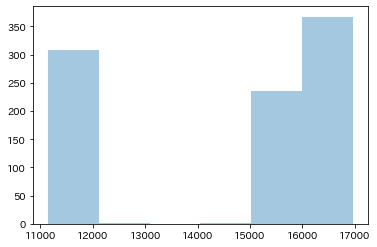

In [3]:
d = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\1_test.npy")
import seaborn as sns
# sns.boxplot(data=d)
sns.distplot(d,kde=False, rug=False)